# Importing essential libraries and data set

In [1]:
#import 
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, linear_model, metrics, neighbors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
df = pd.read_excel('stonechipsdata.xlsx')
df.head()


,SI No.,Sample Location,Quantity of Sample,Original Length,Sawed Length,Diameter,L/D,factor,Crushing Load(KN),Crushing Strength(MPa),Crushing Strength(psi),fc,Type,Construction Year,Project Location and Year,Kc,Standard Deviation,Mean,Coefficient of Variation(CV),fceq
0,1.0,1st Floor Column,3,155,135,67,2.0,1.0,147.812412,41.9,6080,41.9,Shear,Not Available,"Chittagong, Jan 2018",1.47,1.154701,42.566667,0.027127,36.100597
1,NaN,NaN,3,150,135,67,2.0,1.0,154.684156,43.9,6370,43.9,Cone,NaN,NaN,1.47,1.154701,42.566667,0.027127,36.100597
2,NaN,NaN,3,175,133,67,2.0,1.0,147.902304,41.9,6080,41.9,Shear,NaN,NaN,1.47,1.154701,42.566667,0.027127,36.100597
3,2.0,Ground Floor Column,1,162,135,67,2.0,1.0,160.637004,45.5,6600,45.5,Cone,Not Available,"Chittagong, Jan 2018",0.00,0.000000,45.500000,0.000000,38.919937
4,3.0,1st Floor Beam,2,165,136,67,2.0,1.0,156.182356,44.3,6420,44.3,Shear,Not Available,"Chittagong, Jan 2018",2.40,2.192031,42.750000,0.051276,33.784260


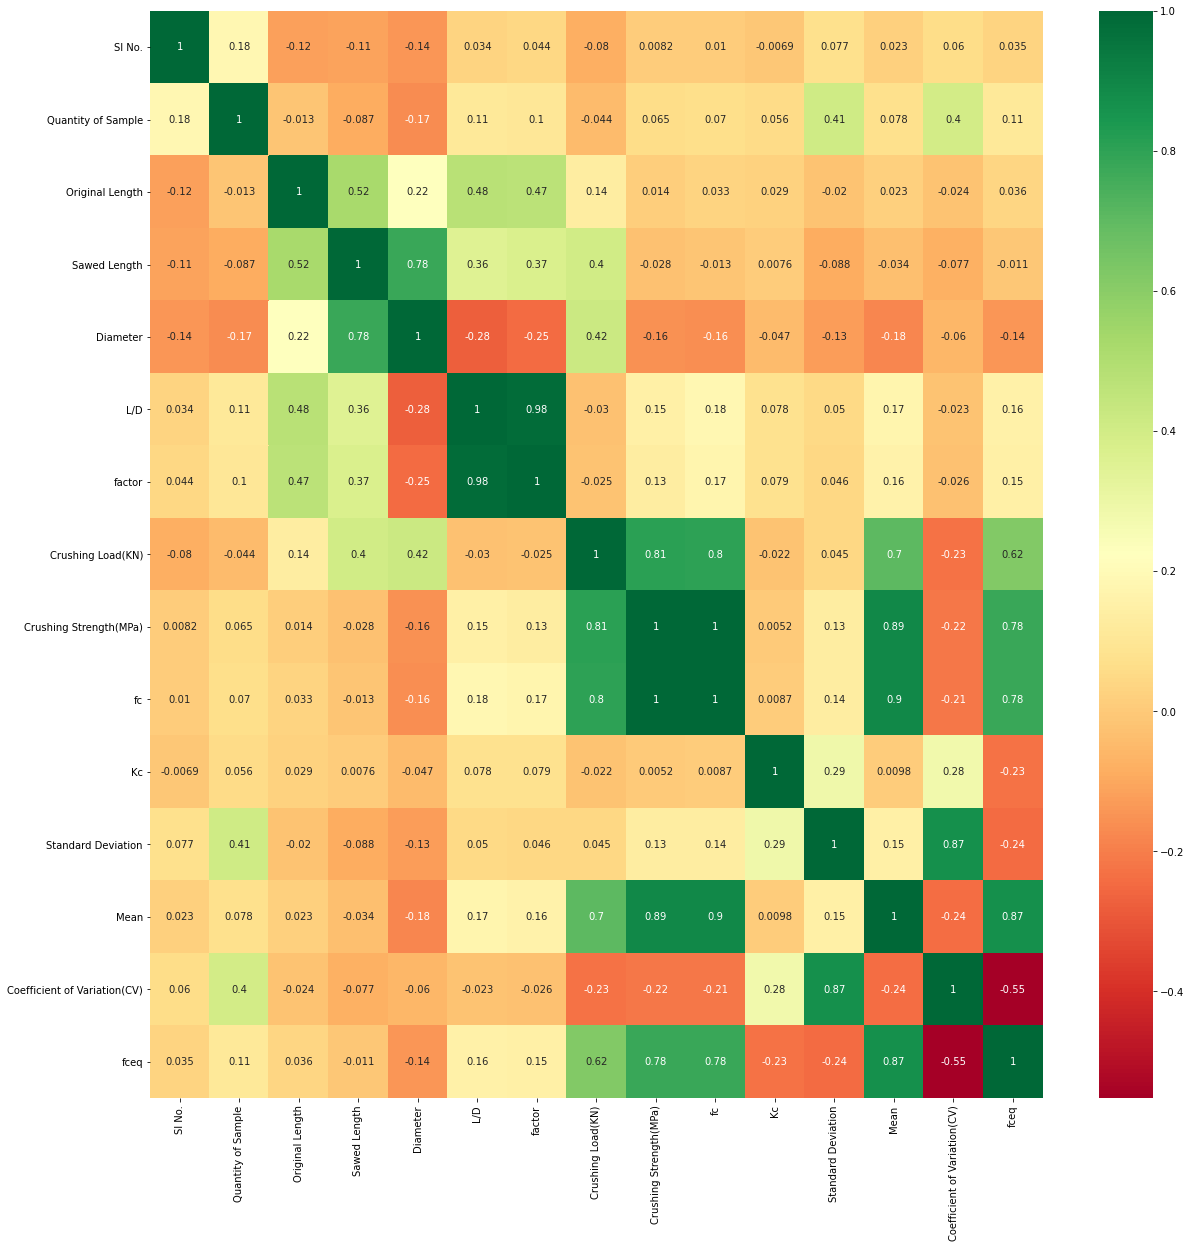

In [2]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Series filling for missing values and check for outliers

SI No.                            0
Sample Location                   0
Quantity of Sample                0
Original Length                   0
Sawed Length                      0
Diameter                          0
L/D                               0
factor                            0
Crushing Load(KN)                 0
Crushing Strength(MPa)            0
Crushing Strength(psi)            0
fc                                0
Type                              1
Construction Year                 0
Project Location and Year       661
Kc                                0
Standard Deviation                0
Mean                              0
Coefficient of Variation(CV)      0
fceq                              0
dtype: int64
SI No.                            0
Sample Location                   0
Quantity of Sample                0
Original Length                   0
Sawed Length                      0
Diameter                          0
L/D                               0
factor         

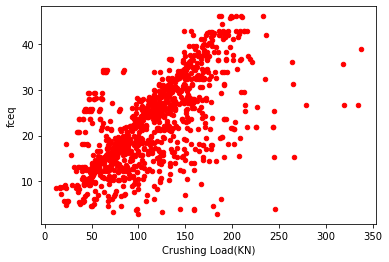

In [3]:
#Filling series data
df['SI No.'] = pd.Series(df['SI No.']).fillna(method='ffill')
df['Sample Location'] = pd.Series(df['Sample Location']).fillna(method='ffill')
df['Construction Year'] = pd.Series(df['Construction Year']).fillna(method='ffill')

#Checking all columns for null values
print(df.isnull().sum())

#Check for null values in Type and dropping
df = df.dropna(subset=['Type'],how='any')
df = df.reset_index(drop=True)
         
#Outliers detection and removal
min_threshold = df['fceq'].quantile(0.01)
outlier1 = df[df['fceq']<min_threshold]
max_threshold = df['fceq'].quantile(0.99)
outlier2 = df[df['fceq']>max_threshold]
df = df[(df['fceq']>min_threshold) & (df['fceq']<max_threshold)]
df = df.reset_index(drop=True)
print(df.isnull().sum())
df.plot(kind='scatter',x='Crushing Load(KN)',y='fceq',color='red')
plt.show()

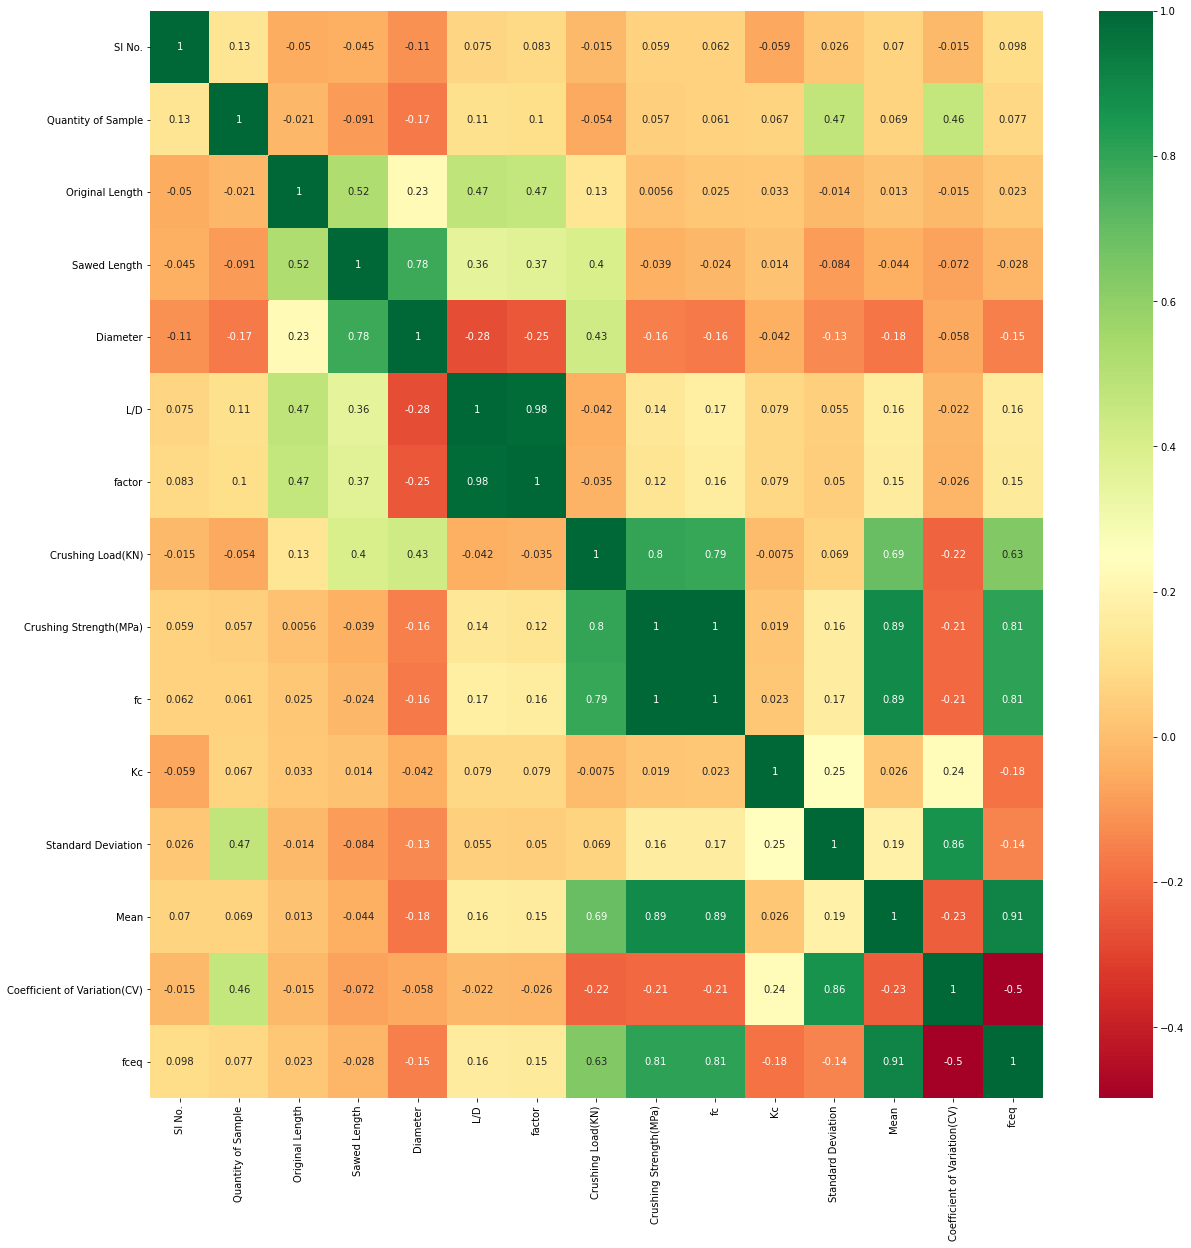

In [4]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Splitting,encoding categorical data and feature scaling

In [5]:
#Splitting to independent and dependant variables
X = df[['Quantity of Sample','L/D','Type','Mean']]
y = df[['fceq']]

#Encoding Categorical Data
Z = X['Type']
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
Z = labelencoder_X.fit_transform(Z)
features = pd.get_dummies(Z,drop_first=True)
merged = pd.concat([features,X],axis='columns')
X = merged.drop(['Type'],axis='columns')

#nplog
#X['Quantity of Sample'] = np.log(X['Quantity of Sample'])
#X['L/D'] = np.log(X['L/D'])
#X['Mean'] = np.log(X['Mean'])

#Splitting to test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 0)

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Linear Regression

The values for linear regression are: 
The rmse train score is: 4.114
The r2 train score is: 0.816
The mae train score is: 2.78
The rmse train score is: 3.409
The r2 test score is: 0.854
The mae test score is: 2.418
Coefficients: 
 [[-0.17883995 -0.54080911  0.43729898  0.27865577  0.76747351  0.32333568
  41.63986215]]
Variance score: 0.8541569670528172


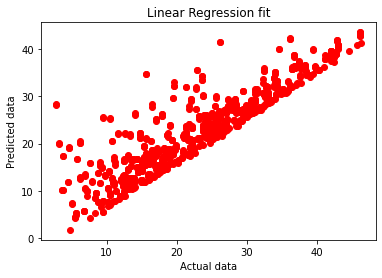

In [6]:
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
######################################################################
pred = reg.predict(X_test)
print('The values for linear regression are: ')
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)),'.3f'))
print('The rmse train score is:',rmse_train)
r2_train = float(format(reg.score(X_train, y_train),'.3f'))
print('The r2 train score is:',r2_train)
mae_train=float(format((metrics.mean_absolute_error(reg.predict(X_train), y_train)),'.3f'))
print('The mae train score is:',mae_train)

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)),'.3f'))
print('The rmse train score is:',rmse_test)
r2_test = float(format(reg.score(X_test, y_test),'.3f'))
print('The r2 test score is:',r2_test)
mae_test=float(format((metrics.mean_absolute_error(reg.predict(X_test), y_test)),'.3f')) 
print('The mae test score is:',mae_test) 
#####################################################################
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# # plot for residual error 
  
# ## setting plot style 
# plt.style.use('fivethirtyeight') 
  
# ## plotting residual errors in training data 
# plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
#             color = "green", s = 10, label = 'Predicted Data') 
  
# ## plotting residual errors in test data 
# plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
#             color = "blue", s = 10, label = 'Actual Data') 
  
# ## plotting line for zero residual error 
# plt.hlines(y = 0, xmin = 0.1, xmax = 1, linewidth = 0.001) 
  
# ## plotting legend 
# plt.legend(loc = 'upper right') 
  
# ## plot title 
# plt.title("Residual errors") 
  
# ## function to show plot 
# ##plt.show()

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.title('Linear Regression fit')
plt.xlabel('Actual data')
plt.show()


# Ridge Regression


The values for ridge regression are: 
The rmse train score is: 4.116
The r2 train score is: 0.816
The mae train score is: 2.789
The rmse train score is: 3.409
The r2 test score is: 0.854
The mae test score is: 2.425


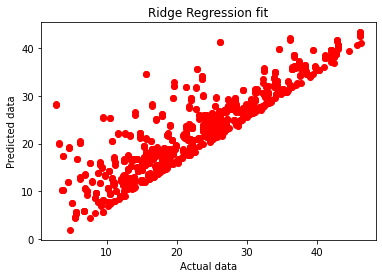

In [7]:
reg = linear_model.Ridge(alpha = 0.5, normalize = False, tol = 0.001,
              solver ='auto', random_state = 42) 
reg.fit(X_train, y_train) 
  
# predicting the y_test 
pred = reg.predict(X_test)
print('')
print('The values for ridge regression are: ')
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)),'.3f'))
print('The rmse train score is:',rmse_train)
r2_train = float(format(reg.score(X_train, y_train),'.3f'))
print('The r2 train score is:',r2_train)
mae_train=float(format((metrics.mean_absolute_error(reg.predict(X_train), y_train)),'.3f'))
print('The mae train score is:',mae_train)

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)),'.3f'))
print('The rmse train score is:',rmse_test)
r2_test = float(format(reg.score(X_test, y_test),'.3f'))
print('The r2 test score is:',r2_test)
mae_test=float(format((metrics.mean_absolute_error(reg.predict(X_test), y_test)),'.3f')) 
print('The mae test score is:',mae_test) 
#####################################################################

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.title('Ridge Regression fit')
plt.show()



# Lasso Regression


The values for Lasso Regression are: 
The rmse train score is: 4.114
The r2 train score is: 0.816
The mae train score is: 2.78
The rmse train score is: 3.408
The r2 test score is: 0.854
The mae test score is: 2.418


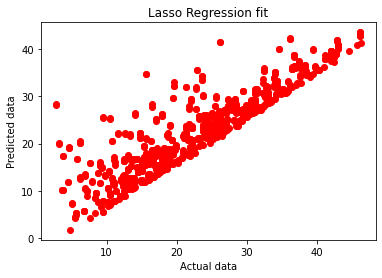

In [8]:
reg = linear_model.Lasso(alpha=0.00001)
reg.fit(X_train, y_train)

pred = reg.predict(X_test)
# predicting the y_test 
pred = reg.predict(X_test)
print('')
print('The values for Lasso Regression are: ')
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)),'.3f'))
print('The rmse train score is:',rmse_train)
r2_train = float(format(reg.score(X_train, y_train),'.3f'))
print('The r2 train score is:',r2_train)
mae_train=float(format((metrics.mean_absolute_error(reg.predict(X_train), y_train)),'.3f'))
print('The mae train score is:',mae_train)

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)),'.3f'))
print('The rmse train score is:',rmse_test)
r2_test = float(format(reg.score(X_test, y_test),'.3f'))
print('The r2 test score is:',r2_test)
mae_test=float(format((metrics.mean_absolute_error(reg.predict(X_test), y_test)),'.3f')) 
print('The mae test score is:',mae_test) 
#####################################################################

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.title('Lasso Regression fit')
plt.show()


# K-Nearest Neighbours Regression


The values for K-Nearest Neighbours Regression are: 
The rmse train score is: 2.181
The r2 train score is: 0.948
The mae train score is: 0.968
The rmse train score is: 3.748
The r2 test score is: 0.824
The mae test score is: 2.304


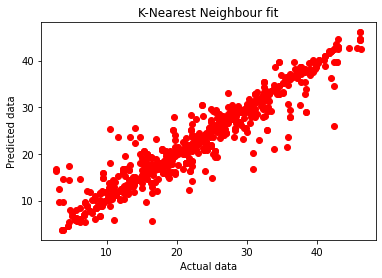

In [9]:
reg = neighbors.KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train, y_train)

# predicting the y_test 
pred = reg.predict(X_test)
print('')
print('The values for K-Nearest Neighbours Regression are: ')
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)),'.3f'))
print('The rmse train score is:',rmse_train)
r2_train = float(format(reg.score(X_train, y_train),'.3f'))
print('The r2 train score is:',r2_train)
mae_train=float(format((metrics.mean_absolute_error(reg.predict(X_train), y_train)),'.3f'))
print('The mae train score is:',mae_train)

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)),'.3f'))
print('The rmse train score is:',rmse_test)
r2_test = float(format(reg.score(X_test, y_test),'.3f'))
print('The r2 test score is:',r2_test)
mae_test=float(format((metrics.mean_absolute_error(reg.predict(X_test), y_test)),'.3f')) 
print('The mae test score is:',mae_test) 
#####################################################################

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.title('K-Nearest Neighbour fit')
plt.show()


# Decision Tree Regression


The values for decision tree are: 
The rmse train score is: 0.326
The r2 train score is: 0.999
The mae train score is: 0.039
The rmse train score is: 2.872
The r2 test score is: 0.896
The mae test score is: 0.935


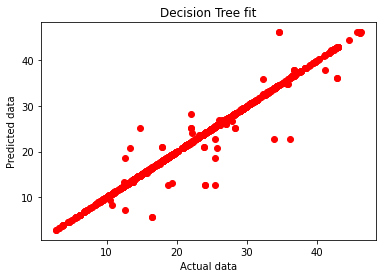

In [10]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
reg.fit(X_train, y_train)

######################################################################
pred = reg.predict(X_test)
print('')
print('The values for decision tree are: ')
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)),'.3f'))
print('The rmse train score is:',rmse_train)
r2_train = float(format(reg.score(X_train, y_train),'.3f'))
print('The r2 train score is:',r2_train)
mae_train=float(format((metrics.mean_absolute_error(reg.predict(X_train), y_train)),'.3f'))
print('The mae train score is:',mae_train)

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)),'.3f'))
print('The rmse train score is:',rmse_test)
r2_test = float(format(reg.score(X_test, y_test),'.3f'))
print('The r2 test score is:',r2_test)
mae_test=float(format((metrics.mean_absolute_error(reg.predict(X_test), y_test)),'.3f')) 
print('The mae test score is:',mae_test) 
#####################################################################

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.title('Decision Tree fit')
plt.show()

# Random Forest Regression


The values for random forest are: 
The rmse train score is: 0.933
The r2 train score is: 0.991
The mae train score is: 0.469
The rmse train score is: 2.303
The r2 test score is: 0.933
The mae test score is: 1.172


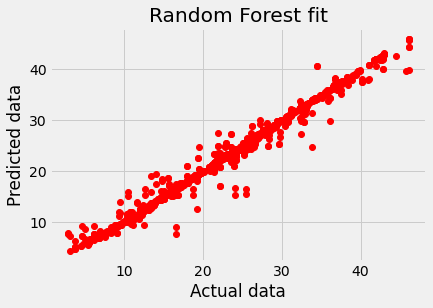

In [118]:
#Random Forest
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
reg = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
reg.fit(X_train, y_train)
print('')
print('The values for random forest are: ')
pred = reg.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)),'.3f'))
print('The rmse train score is:',rmse_train)
r2_train = float(format(reg.score(X_train, y_train),'.3f'))
print('The r2 train score is:',r2_train)
mae_train=float(format((metrics.mean_absolute_error(reg.predict(X_train), y_train)),'.3f'))
print('The mae train score is:',mae_train)

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)),'.3f'))
print('The rmse train score is:',rmse_test)
r2_test = float(format(reg.score(X_test, y_test),'.3f'))
print('The r2 test score is:',r2_test)
mae_test=float(format((metrics.mean_absolute_error(reg.predict(X_test), y_test)),'.3f')) 
print('The mae test score is:',mae_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.title('Random Forest fit')
plt.show()

# Support Vector regression


The values for xgboost are: 
The rmse train score is: 4.376
The r2 train score is: 0.792
The mae train score is: 2.805
The rmse train score is: 3.774
The r2 test score is: 0.821
The mae test score is: 2.641


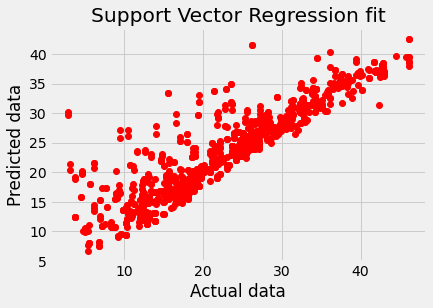

In [119]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train,y_train)

pred = reg.predict(X_test)
print('')
print('The values for xgboost are: ')
pred = reg.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)),'.3f'))
print('The rmse train score is:',rmse_train)
r2_train = float(format(reg.score(X_train, y_train),'.3f'))
print('The r2 train score is:',r2_train)
mae_train=float(format((metrics.mean_absolute_error(reg.predict(X_train), y_train)),'.3f'))
print('The mae train score is:',mae_train)

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)),'.3f'))
print('The rmse train score is:',rmse_test)
r2_test = float(format(reg.score(X_test, y_test),'.3f'))
print('The r2 test score is:',r2_test)
mae_test=float(format((metrics.mean_absolute_error(reg.predict(X_test), y_test)),'.3f')) 
print('The mae test score is:',mae_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.title('Support Vector Regression fit')
plt.show()

# XGBoost Regression


The values for xgboost are: 
The rmse train score is: 0.497
The r2 train score is: 0.997
The mae train score is: 0.273
The rmse train score is: 2.541
The r2 test score is: 0.919
The mae test score is: 1.184


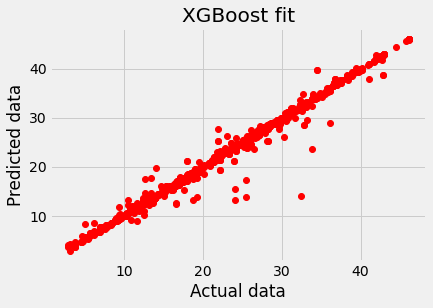

In [120]:
import xgboost as xgb
reg = xgb.XGBRegressor()

reg.fit(X_train,y_train)

pred = reg.predict(X_test)
print('')
print('The values for xgboost are: ')
pred = reg.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)),'.3f'))
print('The rmse train score is:',rmse_train)
r2_train = float(format(reg.score(X_train, y_train),'.3f'))
print('The r2 train score is:',r2_train)
mae_train=float(format((metrics.mean_absolute_error(reg.predict(X_train), y_train)),'.3f'))
print('The mae train score is:',mae_train)

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test)),'.3f'))
print('The rmse train score is:',rmse_test)
r2_test = float(format(reg.score(X_test, y_test),'.3f'))
print('The r2 test score is:',r2_test)
mae_test=float(format((metrics.mean_absolute_error(reg.predict(X_test), y_test)),'.3f')) 
print('The mae test score is:',mae_test)

X_standardized = sc_X.transform(X)
MLR_y_pred_entire_data = reg.predict(X_standardized)
import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.title('XGBoost fit')
plt.show()